### **Ce fichier ne sert uniquement qu'à étudier la qualité des données**

In [54]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
import copy

### Lecture des fichiers de données

In [3]:
df = pd.read_csv("data/qsar_fish_toxicity.csv")

In [4]:
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NDSCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [5]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NDSCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


### Observation des distributions des variables

In [89]:
def hist(data : pd.DataFrame, var_num : str, bin : int = 20, ax : plt.Axes =None) -> plt.Axes:
    """
    Cette fonction sert à afficher un histogramme de distribution
    data : le dataframe contenant les données
    var_num : la variable numérique à afficher
    bin : le nombre de catégories à afficher (= nombre de barres)
    """
    if ax is None:
        _, ax = plt.subplots()
    sns.set_style("whitegrid")
    sns.histplot(data=data, x=var_num, bins=bin, ax=ax)
    ax.set_ylabel("Effectif par catégorie")
    ax.set_title(f"Distribution de la variable : {var_num}")
    return ax

def arrange_hist(data : pd.DataFrame, vars_list : list[str], bin=25) -> None:
    """
    Fonction pour assembler plusieurs histogrammes en sous-graphiques
    """
    nb_graphe = len(vars_list)
    rows = (nb_graphe + 2) // 3
    _, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5*rows))
    axes = axes.flatten()
    for i, var in enumerate(vars_list):
        hist(data, var, bin=bin, ax=axes[i])
    plt.tight_layout()
    plt.show()

def barplot(data : pd.DataFrame, var_cat : str, ax : plt.Axes = None) -> plt.Axes:
    """
    Cette fonction sert à créer un barplot de variable catégorique
    data : dataframe comprenant les données
    var_cat : variable catégorique 
    """
    if ax is None :
        _, ax = plt.subplots()
    value = data[var_cat].value_counts()
    sns.set_style("whitegrid")
    sns.barplot(x=value.index, y=value.values, hue = value.index, ax=ax)
    ax.set_ylabel("Effectif par catégorie")
    ax.set_title(f"Effectif des catégories de : {var_cat}")
    return ax

def arrange_cat(data : pd.DataFrame, vars_list : list[str], bin=25) -> None:
    """
    Fonction pour assembler plusieurs barplot en sous-graphiques
    """
    nb_graphe = len(vars_list)
    rows = (nb_graphe + 2) // 3
    _, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5*rows))
    axes = axes.flatten()
    for i, var in enumerate(vars_list):
        barplot(data, var, ax=axes[i])
    plt.tight_layout()
    plt.show()

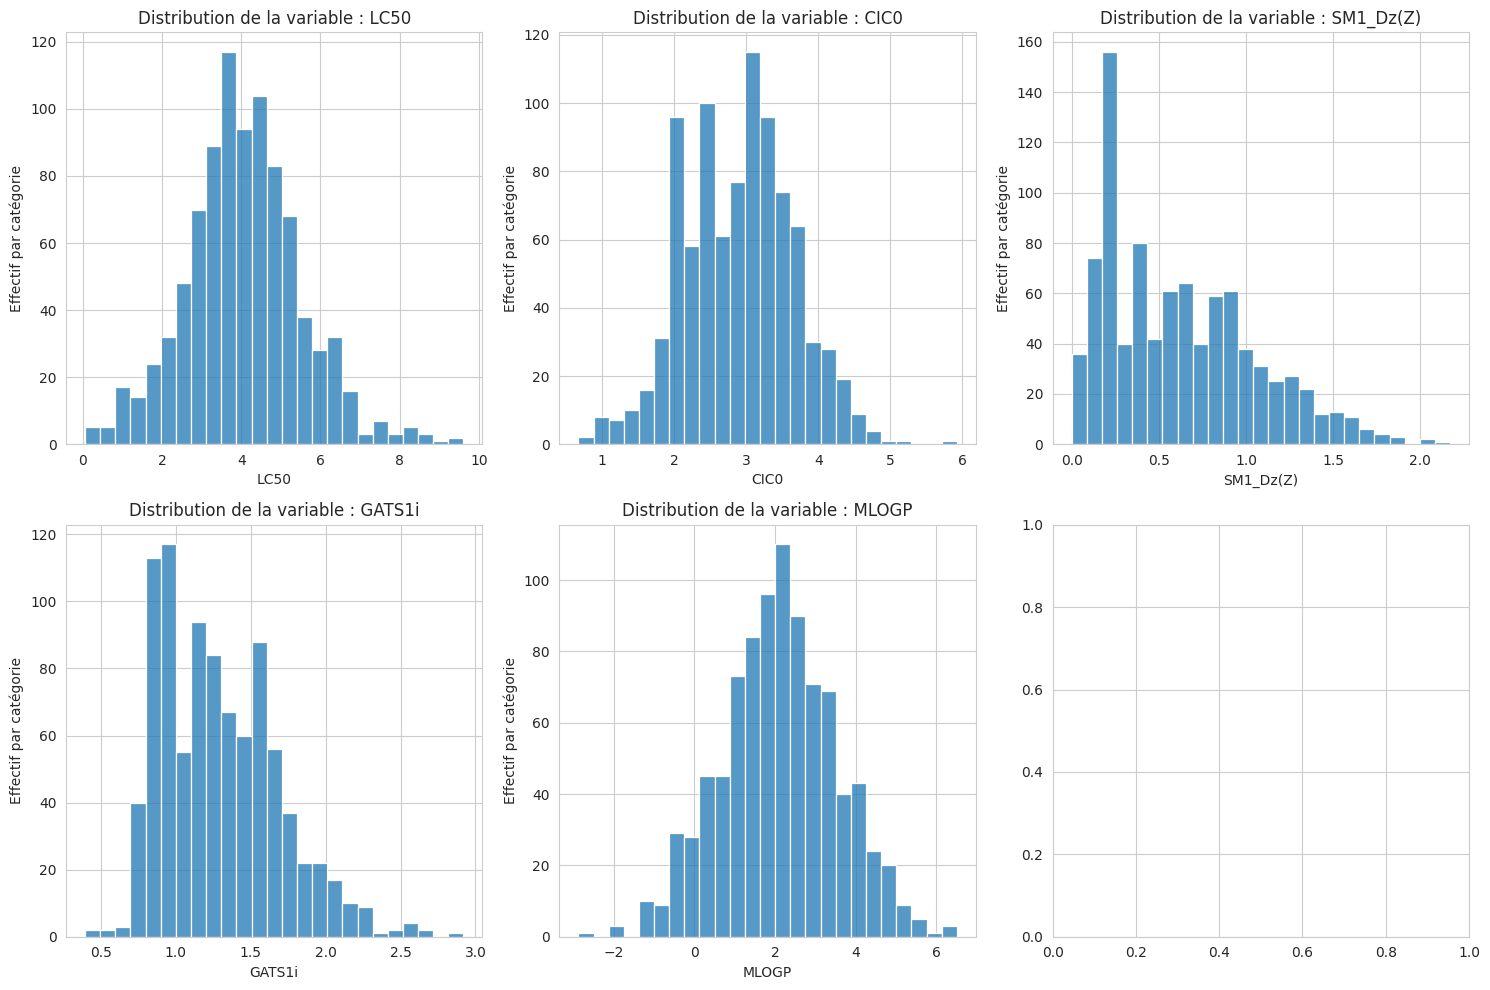

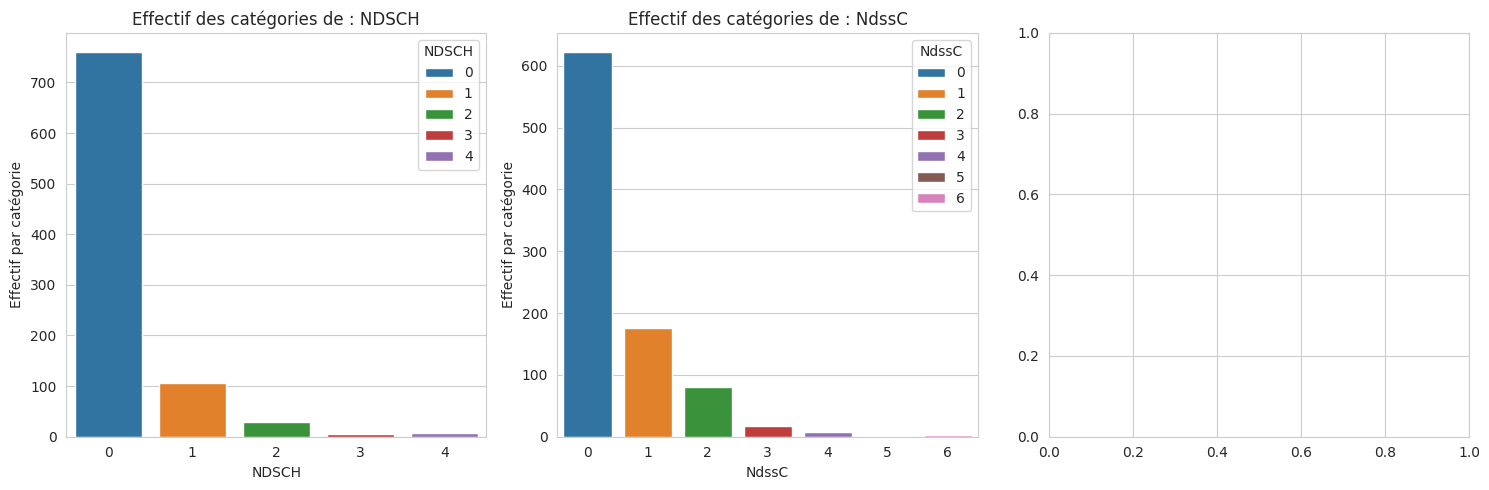

In [91]:
arrange_hist(df, ["LC50", "CIC0", "SM1_Dz(Z)", "GATS1i", "MLOGP"])
arrange_cat(df, ["NDSCH", "NdssC"])

### Vérification des corrélation inter variables

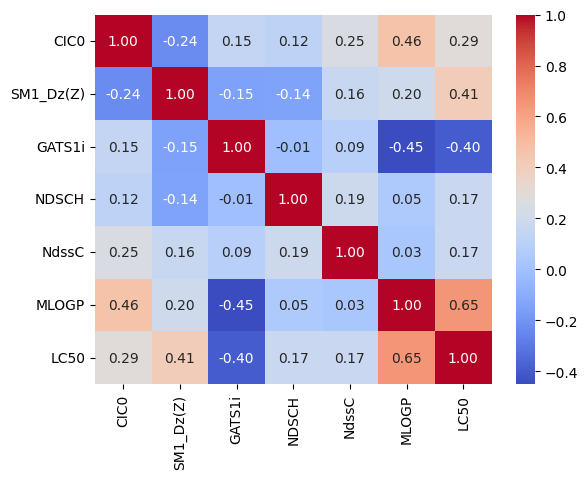

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### ACP sur les données

In [7]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df.drop('LC50', axis=1)) # donne les coordonnées de la PCA pour chaque observation


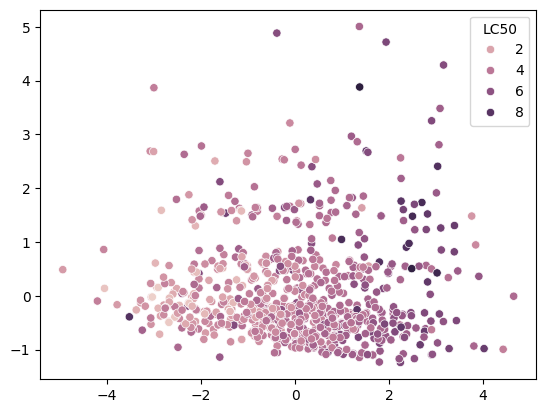

In [15]:
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['LC50'])
plt.show()

In [16]:
fig = px.scatter_3d(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    z=pca_data[:, 2],
    title="ACP 3D",
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    color = df["LC50"]
)
fig.show()

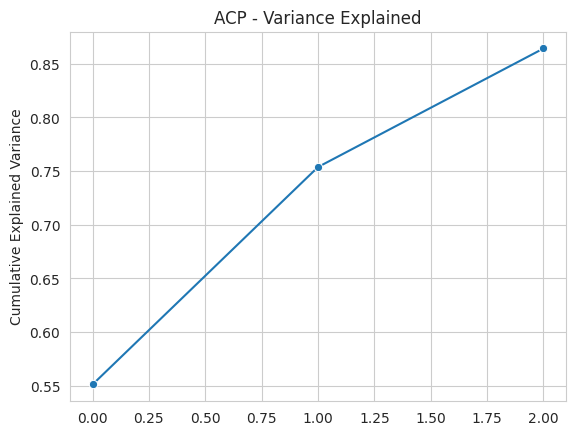

In [22]:
cum_var = pca.explained_variance_ratio_.cumsum()
sns.set_style("whitegrid")
sns.lineplot(cum_var, marker="o")
plt.title("ACP - Variance Explained")
plt.ylabel("Cumulative Explained Variance")
plt.show()